## Welcome to the wedap demo!
---
**wedap** : **w**eighted **e**nsemble **d**ata **a**nalysis and **p**lotting (pronounced we-dap)

Here we will go through many examples of how to use the Python API or the command line for various types of plots using wedap and mdap. Note that the CLI will tend to format and label more things for you, while the API starts as more of a "blank slate" format wise since the options can be more easily adjusted.

In [1]:
import wedap
import matplotlib.pyplot as plt

In [10]:
# apply default wedap matplotlib style sheet
plt.style.use("../../styles/default.mplstyle")

## The first set of examples is for basic wedap usages
---

### Example 1

```
$ wedap -W p53.h5 --data-type evolution --xlabel "Progress Coordinate 0"
```

Evolution:   0%|          | 0/19 [00:00<?, ?it/s]

Text(7.375, 0.5, 'WE Iteration')

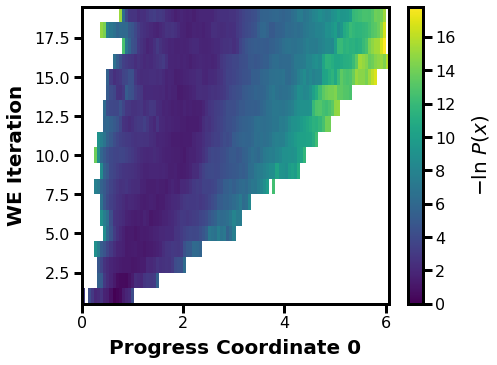

In [13]:
wedap.H5_Plot(h5="p53.h5", data_type="evolution").plot()
plt.xlabel("Progress Coordinate 0")
plt.ylabel("WE Iteration")

Alternatively we can use the mpl object-based interface, this offers more flexibility when making more complex plots, examples of which will be demonstrated later along in this notebook.

Evolution:   0%|          | 0/19 [00:00<?, ?it/s]

Text(7.375, 0.5, 'WE Iteration')

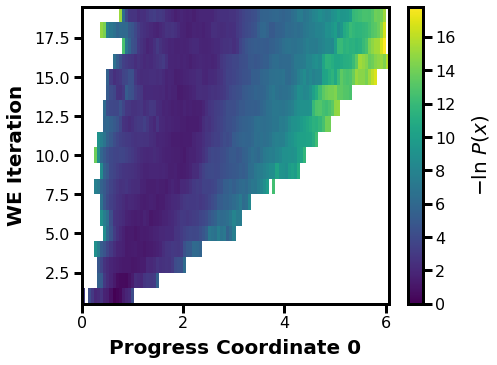

In [16]:
# instantiate the wedap H5_Plot class
wedap_obj = wedap.H5_Plot(h5="p53.h5", data_type="evolution")
# run the main plotting method
wedap_obj.plot()
# call the mpl axes object (ax) from wedap class object and format
wedap_obj.ax.set_xlabel("Progress Coordinate 0")
wedap_obj.ax.set_ylabel("WE Iteration")

### Example 2

```
$ wedap -W p53.h5 -dt average --plot-mode line --xlabel "Progress Coordinate 0"
```

Average 1D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(0.5, 10.0, 'Progress Coordinate 0')

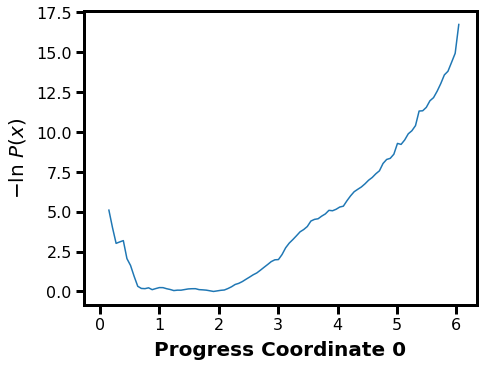

In [17]:
wedap.H5_Plot(h5="p53.h5", data_type="average", plot_mode="line").plot()
plt.xlabel("Progress Coordinate 0")

### Example 3

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 1" -xi 1 -dt average  -y dihedral_11 --ylabel "Aux Coordinate"
```

Average 2D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(-0.875, 0.5, 'Aux Coordinate')

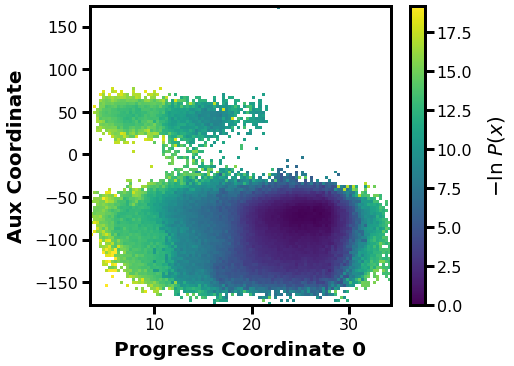

In [19]:
wedap.H5_Plot(h5="p53.h5", data_type="average", Xindex=1, Yname="dihedral_11").plot()
plt.xlabel("Progress Coordinate 0")
plt.ylabel("Aux Coordinate")

### Example 4

```
$ wedap -W p53.h5 --xlabel "Aux Coordinate 0" -x dihedral_11  -dt average  -y dihedral_12 --ylabel "Aux Coordinate 1" -z pcoord --cbar-label "Progress Coordinate 0" -pm scatter3d
```

Average 3D:   0%|          | 0/19 [00:00<?, ?it/s]

Text(-0.875, 0.5, 'Aux Coordinate 1')

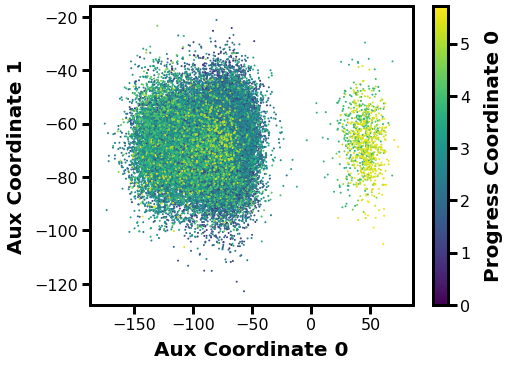

In [21]:
wedap.H5_Plot(h5="p53.h5", data_type="average", plot_mode="scatter3d", 
              Xname="dihedral_11", Yname="dihedral_12", Zname="pcoord",
              cbar_label="Progress Coordinate 0").plot()
plt.xlabel("Aux Coordinate 0")
plt.ylabel("Aux Coordinate 1")

### Example 5

```
$ wedap -W p53.h5 --xlabel "Progress Coordinate 0" -xi 0  -dt average  -y dihedral_11 --ylabel "Aux Coordinate" --joint-plot -pm contour_f --cmap gnuplot_r --style ggplot --p-units kcal --first-iter 3 --last-iter 15 --pmin 1 --pmax 10 --smoothing-level 1 --xlim -1 7 --ylim -180 180
```

Average 2D:   0%|          | 0/13 [00:00<?, ?it/s]

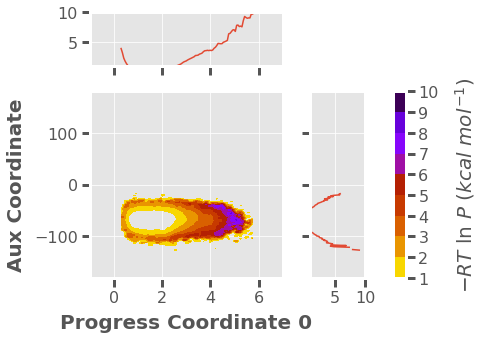

In [36]:
# if there is alot of plotting choices, it can be easier to just put it all into a dictionary
plot_options = {"h5" : "p53.h5",
                "data_type" : "average", 
                "plot_mode" : "contour_f", 
                "Xname" : "pcoord", 
                "Yname" : "dihedral_12", 
                "cmap" : "gnuplot_r",
                "jointplot" : True, 
                "p_units" : "kcal",
                "first_iter" : 3, 
                "last_iter" : 15, 
                "p_min" : 1, 
                "p_max" : 10,
                "smoothing_level" :1,
                # the input plot_options kwarg dict is also parsed for matplotlib formatting keywords
                "xlabel" : "Progress Coordinate 0",
                "ylabel" : "Aux Coordinate",
                "xlim" : (-1, 7),
                "ylim" : (-180, 180),
                }
#plt.style.use("ggplot")
wedap.H5_Plot(**plot_options).plot()

In [38]:
# change style back to wedap default
#plt.style.use("../../styles/default.mplstyle")

## The next set of examples is with mdap: plotting directly from standard MD data
---
**mdap** : **m**olecular **d**ynamics **a**nalysis and **p**lotting (pronounced em-dap)

The input data from standard MD simulations must be in >=2 column format:
use hash symbols (#) at top of data file to indicate comments (skipped lines)

COL1:Frame | COL2:Data | COL3:Data...

In [ ]:
import mdap

### Example 6

```
$ mdap -x rms_bb_xtal.dat --xlabel "Input Data 0" -pm line
```

Text(0.5, 10.0, 'Input Data 0')

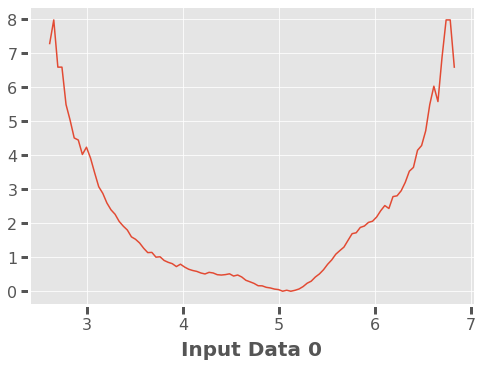

In [37]:
X, Y, Z = mdap.MD_Pdist(Xname=["rms_bb_xtal.dat"], data_type="pdist").pdist()
wedap.H5_Plot(X, Y, Z, plot_mode="line").plot()
plt.xlabel("Input Data 0")

## The next set of examples is to show more advanced wedap capabilities
---

* multi panel pdists
* multi 1D pdists on one axis
* trace traj
* gif
* sklearn clustering / pca